In [2]:
from google.colab import files
uploaded = files.upload()  # this will prompt you to upload your CSV file


Saving archive (1).zip to archive (1).zip


In [4]:
import zipfile
import os
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('./customer_data')  # extracts all files to this folder

# Step 2: Check extracted files
print("Extracted files:", os.listdir('./customer_data'))

# Step 3: Load CSV
data = pd.read_csv('./customer_data/customer_data.csv')  # replace with exact CSV name if different
print(data.head())


Extracted files: ['Online Retail.xlsx']


FileNotFoundError: [Errno 2] No such file or directory: './customer_data/customer_data.csv'

In [5]:
import pandas as pd
import zipfile
import os

# Step 1: Unzip the file
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('./customer_data')  # extracts all files to this folder

# Step 2: Check extracted files
print("Extracted files:", os.listdir('./customer_data'))

# Step 3: Load Excel file
data = pd.read_excel('./customer_data/Online Retail.xlsx')  # exact filename
print(data.head())
print(data.info())


Extracted files: ['Online Retail.xlsx']
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtyp

In [7]:
# Drop rows without CustomerID
data_clean = data.dropna(subset=['CustomerID']).copy()

# Create TotalPrice column
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']

# Aggregate data by CustomerID
customer_data = data_clean.groupby('CustomerID').agg({
    'InvoiceNo':'nunique',       # number of orders
    'Quantity':'sum',            # total quantity bought
    'TotalPrice':'sum',          # total spend
    'UnitPrice':'mean'           # average unit price
}).reset_index()

customer_data.rename(columns={'InvoiceNo':'NumOrders', 'Quantity':'TotalQuantity',
                              'TotalPrice':'TotalSpend', 'UnitPrice':'AvgUnitPrice'}, inplace=True)

print(customer_data.head())

# Scale numeric features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['NumOrders','TotalQuantity','TotalSpend','AvgUnitPrice']])

print(scaled_features[:5])


   CustomerID  NumOrders  TotalQuantity  TotalSpend  AvgUnitPrice
0     12346.0          2              0        0.00      1.040000
1     12347.0          7           2458     4310.00      2.644011
2     12348.0          4           2341     1797.24      5.764839
3     12349.0          1            631     1757.55      8.289041
4     12350.0          1            197      334.40      3.841176
[[-0.32936215 -0.24021456 -0.23100099 -0.04787005]
 [ 0.20610242  0.28586959  0.29343167 -0.03680384]
 [-0.11517632  0.26082816 -0.01231622 -0.01527298]
 [-0.43645506 -0.10516204 -0.01714563  0.00214171]
 [-0.43645506 -0.19805078 -0.19031183 -0.02854449]]


In [9]:
# Drop rows without CustomerID
data_clean = data.dropna(subset=['CustomerID']).copy()

# Create TotalPrice column
data_clean['TotalPrice'] = data_clean['Quantity'] * data_clean['UnitPrice']

# Aggregate data by CustomerID
customer_data = data_clean.groupby('CustomerID').agg({
    'InvoiceNo':'nunique',       # number of orders
    'Quantity':'sum',            # total quantity bought
    'TotalPrice':'sum',          # total spend
    'UnitPrice':'mean'           # average unit price
}).reset_index()

customer_data.rename(columns={'InvoiceNo':'NumOrders', 'Quantity':'TotalQuantity',
                              'TotalPrice':'TotalSpend', 'UnitPrice':'AvgUnitPrice'}, inplace=True)

# Scale numeric features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['NumOrders','TotalQuantity','TotalSpend','AvgUnitPrice']])


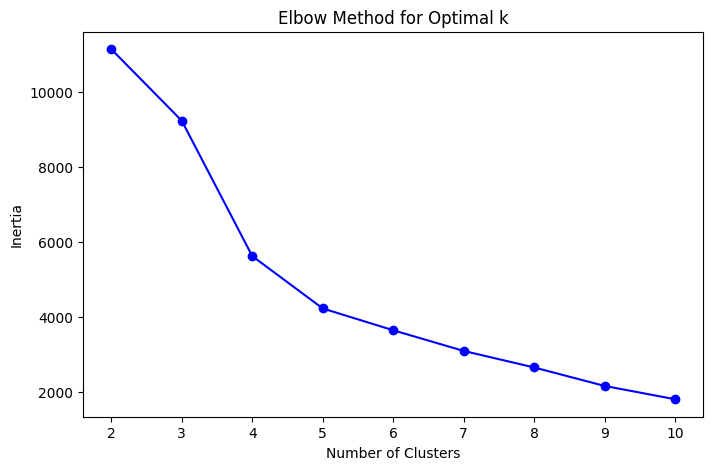

Clusters=2, Silhouette Score=0.963
Clusters=3, Silhouette Score=0.862
Clusters=4, Silhouette Score=0.866
Clusters=5, Silhouette Score=0.776
Clusters=6, Silhouette Score=0.714
Clusters=7, Silhouette Score=0.714
Clusters=8, Silhouette Score=0.756
Clusters=9, Silhouette Score=0.657
Clusters=10, Silhouette Score=0.663
Cluster
0    4249
2     113
1       8
3       2
Name: count, dtype: int64


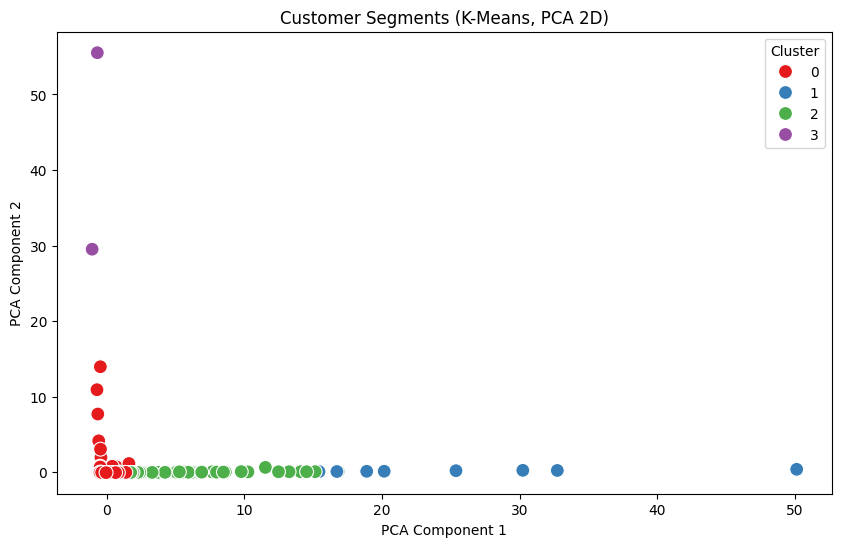

           CustomerID  NumOrders  TotalQuantity     TotalSpend  AvgUnitPrice
Cluster                                                                     
0        15305.174865   4.030360     722.512827    1196.116504      5.187292
1        15360.625000  80.000000   83266.500000  155483.796250      5.182650
2        15071.433628  39.106195   10360.530973   17500.305752      4.042448
3        16273.000000   3.000000      29.500000   -1819.065000   6171.705000


In [12]:
# ==========================
# 1️⃣ K-Means Clustering
# ==========================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Scores for different k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Clusters={k}, Silhouette Score={score:.3f}")

# Choose optimal k (example: k=4 based on elbow & silhouette)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)
print(customer_data['Cluster'].value_counts())

# ==========================
# 2️⃣ PCA for 2D Visualization
# ==========================
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1],
                hue=customer_data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (K-Means, PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# ==========================
# 3️⃣ Cluster Profiling
# ==========================
cluster_summary = customer_data.groupby('Cluster').mean()
print(cluster_summary)

# Optional: actionable insights
# Example:
# Cluster 0 → high spenders, frequent buyers
# Cluster 1 → low spenders, occasional buyers
# Cluster 2 → new customers, potential upselling
# Cluster 3 → medium spend, frequent buyers


Original data: 4372 customers
After outlier removal: 4286 customers
Clusters=2, Silhouette Score=0.757
Clusters=3, Silhouette Score=0.627
Clusters=4, Silhouette Score=0.633
Clusters=5, Silhouette Score=0.588
Clusters=6, Silhouette Score=0.570


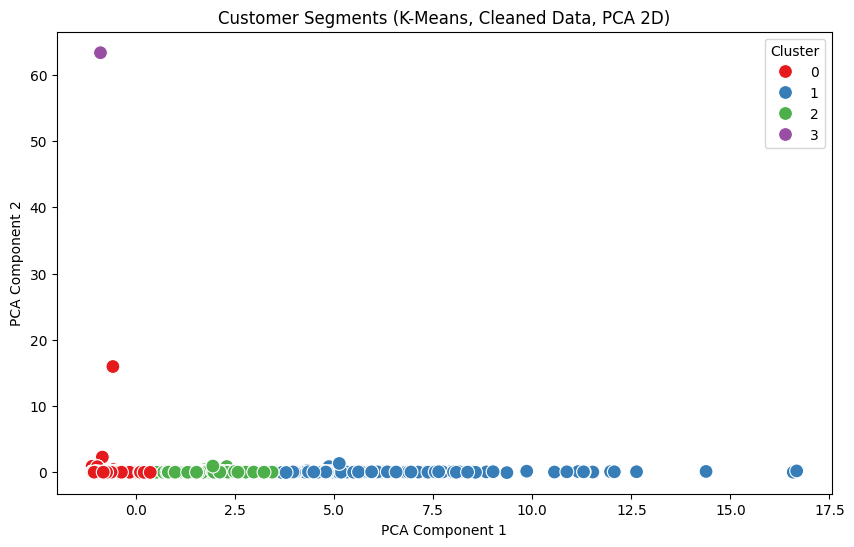

           CustomerID  NumOrders  TotalQuantity   TotalSpend  AvgUnitPrice
Cluster                                                                   
0        15350.114371   2.515269     355.161078   604.887639      4.347885
1        14986.274390  23.475610    5365.237805  8746.784085      4.849041
2        15150.469910   9.539052    1829.622279  3039.761807      3.564212
3        15098.000000   5.000000      60.000000   649.500000   8055.780000


In [13]:
# ==========================
# 1️⃣ Remove Outliers
# ==========================
# Remove customers with negative or extremely high TotalSpend
# Use 1st and 99th percentile as cutoff
lower_limit = customer_data['TotalSpend'].quantile(0.01)
upper_limit = customer_data['TotalSpend'].quantile(0.99)

customer_data_clean = customer_data[(customer_data['TotalSpend'] >= lower_limit) &
                                    (customer_data['TotalSpend'] <= upper_limit)].copy()

print(f"Original data: {customer_data.shape[0]} customers")
print(f"After outlier removal: {customer_data_clean.shape[0]} customers")

# Scale numeric features again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features_clean = scaler.fit_transform(customer_data_clean[['NumOrders','TotalQuantity','TotalSpend','AvgUnitPrice']])

# ==========================
# 2️⃣ Re-run K-Means
# ==========================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Optional: try k=2 to k=6 and silhouette scores
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features_clean)
    score = silhouette_score(scaled_features_clean, labels)
    print(f"Clusters={k}, Silhouette Score={score:.3f}")

# Choose optimal k (example: k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data_clean['Cluster'] = kmeans.fit_predict(scaled_features_clean)

# ==========================
# 3️⃣ PCA Visualization
# ==========================
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features_clean)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1],
                hue=customer_data_clean['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (K-Means, Cleaned Data, PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# ==========================
# 4️⃣ Cluster Profiling
# ==========================
cluster_summary_clean = customer_data_clean.groupby('Cluster').mean()
print(cluster_summary_clean)


Cleaned and clustered dataset saved as 'customer_segments.csv'
Cluster Summary:
           CustomerID  NumOrders  TotalQuantity   TotalSpend  AvgUnitPrice
Cluster                                                                   
0        15350.114371   2.515269     355.161078   604.887639      4.347885
1        14986.274390  23.475610    5365.237805  8746.784085      4.849041
2        15150.469910   9.539052    1829.622279  3039.761807      3.564212
3        15098.000000   5.000000      60.000000   649.500000   8055.780000


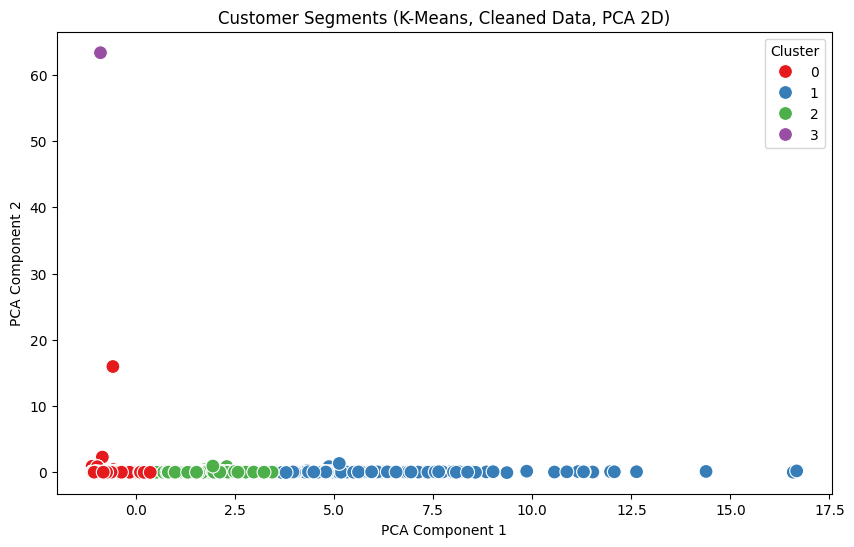

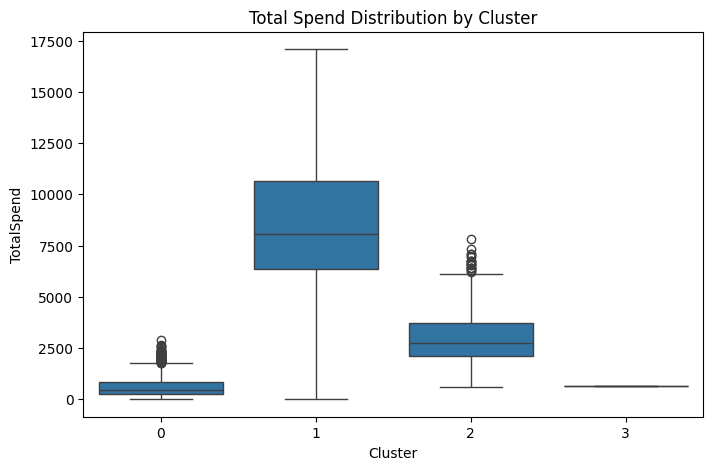


Actionable Business Insights:
Cluster 0: Medium-value customers → targeted upselling
Cluster 1: High-value customers → offer loyalty/VIP programs
Cluster 2: High-value customers → offer loyalty/VIP programs
Cluster 3: Medium-value customers → targeted upselling


In [14]:
# ==========================
# 1️⃣ Save Cleaned Clustered Dataset
# ==========================
customer_data_clean.to_csv('customer_segments.csv', index=False)
print("Cleaned and clustered dataset saved as 'customer_segments.csv'")

# ==========================
# 2️⃣ Cluster Summary Table
# ==========================
cluster_summary_clean = customer_data_clean.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary_clean)

# ==========================
# 3️⃣ Visualizations
# ==========================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA scatter plot
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features_clean)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1],
                hue=customer_data_clean['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (K-Means, Cleaned Data, PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# TotalSpend distribution by cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='TotalSpend', data=customer_data_clean)
plt.title('Total Spend Distribution by Cluster')
plt.show()

# ==========================
# 4️⃣ Actionable Insights
# ==========================
print("\nActionable Business Insights:")
for i, row in cluster_summary_clean.iterrows():
    if row['TotalSpend'] > customer_data_clean['TotalSpend'].quantile(0.75):
        seg = "High-value customers → offer loyalty/VIP programs"
    elif row['TotalSpend'] > customer_data_clean['TotalSpend'].quantile(0.4):
        seg = "Medium-value customers → targeted upselling"
    else:
        seg = "Regular customers → retention campaigns and small promotions"
    print(f"Cluster {i}: {seg}")


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


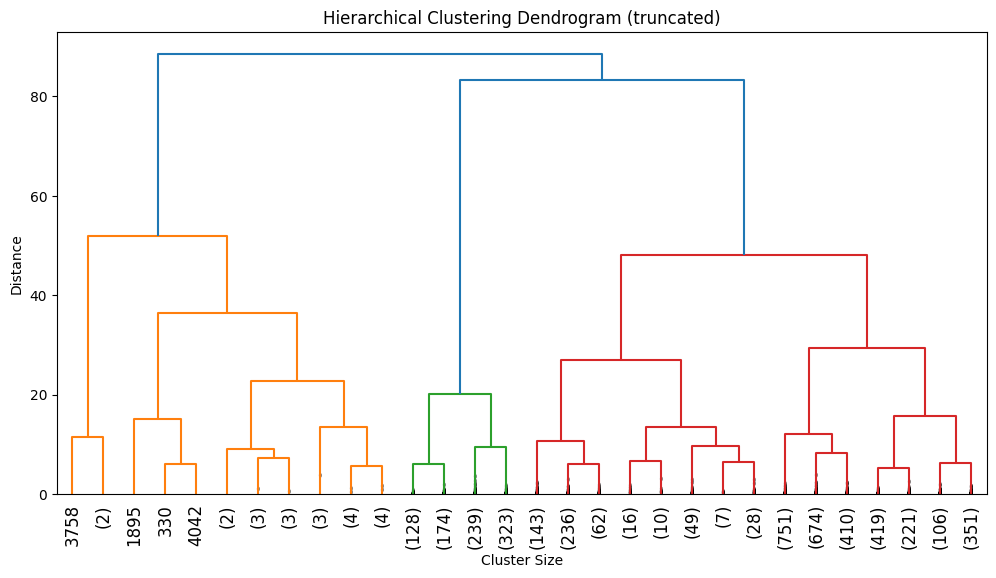

HierCluster
4    3483
3     864
2      22
1       3
Name: count, dtype: int64
DBSCAN_Cluster
 0    4345
-1      27
Name: count, dtype: int64

Hierarchical Cluster Profiles:
   HierCluster     Recency  Frequency       Monetary
0            1    3.666667  64.666667  241136.560000
1            2    6.727273  85.000000   56018.827727
2            3  270.133102   1.739583     450.109098
3            4   48.485788   5.346827    1709.832806
Cluster 0: High-value customers → VIP/loyalty programs
Cluster 1: High-value customers → VIP/loyalty programs
Cluster 2: At-risk / churn → re-engagement campaigns
Cluster 3: High-value customers → VIP/loyalty programs


In [15]:
# ==========================
# 1️⃣ Additional Features for Profiling (RFM)
# ==========================
import pandas as pd

# Convert InvoiceDate to datetime if not already
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# Recency: days since last purchase
import datetime as dt
snapshot_date = data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'}, inplace=True)
print(rfm.head())

# Scale RFM features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

# ==========================
# 2️⃣ Hierarchical Clustering
# ==========================
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Linkage matrix
Z = linkage(rfm_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Assign clusters (example: 4 clusters)
rfm['HierCluster'] = fcluster(Z, 4, criterion='maxclust')
print(rfm['HierCluster'].value_counts())

# ==========================
# 3️⃣ DBSCAN Clustering
# ==========================
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
print(rfm['DBSCAN_Cluster'].value_counts())

# ==========================
# 4️⃣ Cluster Profiling (RFM + Churn Risk)
# ==========================
rfm_profile = rfm.groupby('HierCluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean'
}).reset_index()
print("\nHierarchical Cluster Profiles:")
print(rfm_profile)

# Optional interpretation
for i, row in rfm_profile.iterrows():
    recency = row['Recency']
    frequency = row['Frequency']
    monetary = row['Monetary']
    if monetary > rfm['Monetary'].quantile(0.75):
        seg = "High-value customers → VIP/loyalty programs"
    elif frequency > rfm['Frequency'].quantile(0.5):
        seg = "Frequent buyers → retention campaigns"
    elif recency > rfm['Recency'].quantile(0.75):
        seg = "At-risk / churn → re-engagement campaigns"
    else:
        seg = "Regular customers → standard marketing"
    print(f"Cluster {i}: {seg}")
